# Statistical Methods

### Task 1 

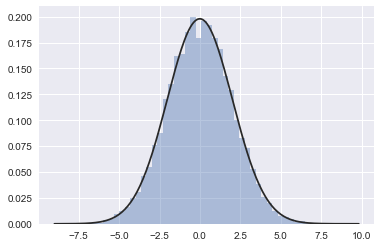

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

sns.distplot(np.random.normal(0, 2, 10000), kde=False, fit=stats.gamma);

### Task 2

In [114]:
# Gambler ruin game for two players:
#  player_bank: int - initial number of coins for player
#  opponent_bank: int - initial number of coins for opponent 
#  p: float - propability of player win
#  max_i: int - maximum number of iterations allowed
def gambler_ruin(player_bank, opponent_bank, p, max_i):
    player = player_bank
    opponent = opponent_bank
    hist_player = [player]
    hist_opponent = [opponent]
    i = max_i
    while 0 < player < (player_bank + opponent_bank) and 0 < i:
        result = (-1, 1) if p < np.random.random() else (1, -1)
        player += result[0]
        opponent += result[1]
        hist_player.append(player)
        hist_opponent.append(opponent)
        i -= 1
    return {"player":hist_player, "opponent":hist_opponent}

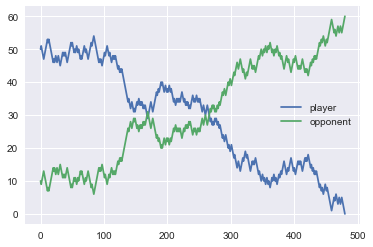

In [116]:
result = gambler_ruin(50, 10, 0.42, 1000)    
plt.plot(result["player"], label="player");
plt.plot(result["opponent"], label="opponent");
plt.legend(loc='best')
plt.show()

### Task 3

In [121]:
# Propability for -fair- coin flipping
#  n1: int - first player coins
#  n2: int - second player coins
def fair_propability(n1, n2):
    return n2 / (n1 + n2)

# Propability for -unfair- coin flipping 
#  n1: int - first player coins
#  n2: int - second player coins
#  p: float - propability of player win
#  q: float - propability of opponent win
def unfair_propability(n1, n2, p, q):
    # Note that p + q should always be equal to 1 !!!
    if p == 0.5 or q ==0.5:
        return fair_propability(n1, n2)
    return (1 - (p / q) ** n2) / (1 - (p / q) ** (n1 + n2))

# Propability of gambler ruin for two players (analitical approach)
#  player_bank: int - initial number of coins for player
#  opponent_bank: int - initial number of coins for opponent 
#  p: float - propability of player win
#  q: float - propability of opponent win
def analitical_gambler_ruin(player_bank, opponent_bank, p, q):
    player_propability = unfair_propability(player_bank, opponent_bank, p, q)
    return (player_propability, 1 - player_propability)

# Combine result from actual gambler ruin and analytical result
#  player_bank: int - initial number of coins for player
#  opponent_bank: int - initial number of coins for opponent 
#  p: float - propability of player win
#  q: float - propability of opponent win
def combine(player_bank, opponent_bank, p, q):
    result = gambler_ruin(player_bank, opponent_bank, p, q)
    analitical_result = analitical_gambler_ruin(player_bank, opponent_bank, p, 1-p)
    return(result["player"][-1], result["opponent"][-1], analitical_result[0], analitical_result[1])

# Combine result from actual gambler ruin and analytical result
#  bankroll_range: int - a range that will be used as the initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def generate_results(bankroll_range, propability, max_i):    
    player_results = []
    player_losing_predictions = []
    for bankroll in bankroll_range:
        result = combine(bankroll, bankroll, propability, max_i)
        player_results.append(result[0])
        player_losing_predictions.append(result[2])
    return [player_results, player_losing_predictions]

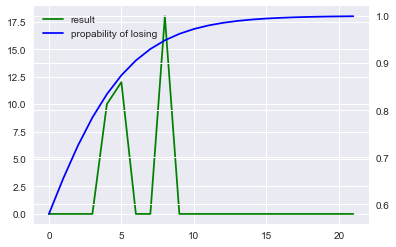

In [154]:
def plot_and_show(values, twinx_values, title, twinx_title, color, twinx_color):
    fig, axis = plt.subplots()
    twinx_axis = axis.twinx()
    lines = axis.plot(values, label=title, color=color)
    lines += twinx_axis.plot(twinx_values, label=twinx_title, color=twinx_color)
    labels = [line.get_label() for line in lines]
    plt.legend(lines, labels, loc='best')
    plt.show()

results = generate_results(range(1, 23), 0.42, 1000)
plot_and_show(results[0], results[1], "result", "propability of losing", "g", "b")